**SWAPNIL JITENDRA DHANKE**

 Task #6 Prediction using Decision Tree Algorithm
 
 The sparks Foundation

**Import Drive **

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Set Data path**

In [15]:
data_path = '/content/drive/My Drive/Colab Notebooks'

**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

**Load the data**

In [17]:
mydata_iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris.csv")
mydata_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# To check first 5 rows of dataset
mydata_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*DATA Analysis*

In [20]:
# Checking all the columns
mydata_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
# As we dont need the "ID" column
mydata_iris.drop('Id',axis = 1,inplace = True)

#The Id coulmn is now deleted

In [23]:
#To again verify 
mydata_iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#Information of the dataset
mydata_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
#Overview of dtypes
mydata_iris.dtypes


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [27]:
#Checking null/Missing values
mydata_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
#Stats of the dataset
mydata_iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [29]:
#To check the Skewness of the attributes
mydata_iris.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

Visualization of the Data

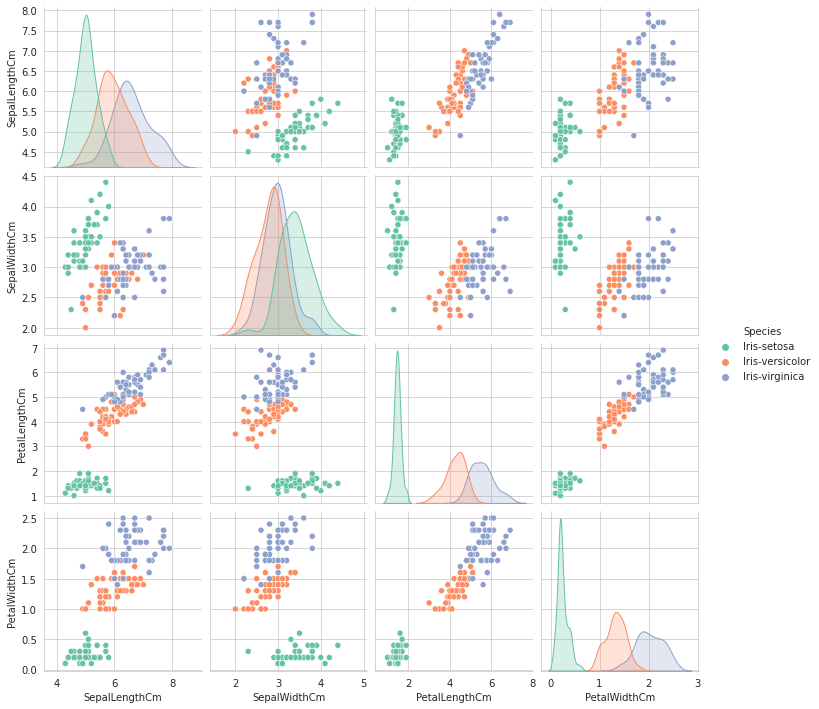

In [32]:
# PAIR PLOT
sns.pairplot(mydata_iris,hue ='Species',palette = 'Set2')

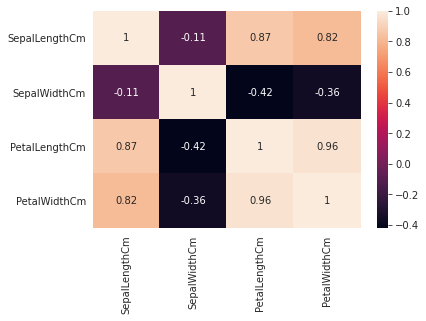

In [33]:
#Corelation between the attributes
sns.heatmap(mydata_iris.corr(),annot= True)

Taking ***Feature variable*** to **X** and ***Response variable*** to **Y**

In [36]:
X = mydata_iris[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
Y = mydata_iris[['Species']]

**Splitting data into train and test data**

In [38]:
from sklearn.model_selection import train_test_split  #Importing the library
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.30, random_state=1)
print('X_train' , X_train.shape)
print('X_test' ,X_test.shape)
print('Y_train' ,Y_train.shape)
print('Y_test' , Y_test.shape)

X_train (105, 4)
X_test (45, 4)
Y_train (105, 1)
Y_test (45, 1)


**Decision tree Algorithm and Visualiztion**

In [40]:
# Importing libraries for Descision tree algorithm and visulatization
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
from sklearn import tree
from six import StringIO
from IPython.display import Image
import matplotlib.image as mpimg
from sklearn import metrics

In [41]:
# Defining the decision tree algorithm
dt_model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=60)
dt_model.fit(X_train , Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=60, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

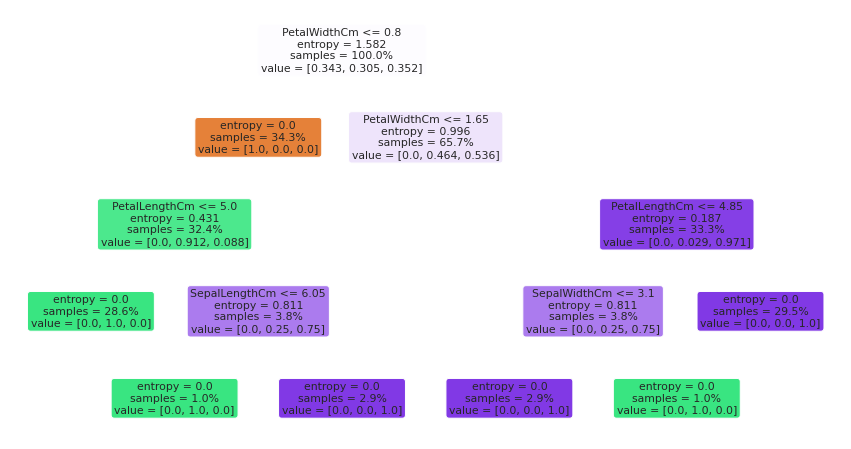

In [42]:
#visualize the Decision Tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model, filled = True ,feature_names = mydata_iris.columns, precision= 3,proportion= True, rounded = True)
plt.show()

**Prediction of the Data**

In [43]:
predict_test = dt_model.predict(X_test)

In [44]:
print("The accuracy of the Descision Tree is" , metrics.accuracy_score(predict_test,Y_test)*100,'%')

The accuracy of the Descision Tree is 95.55555555555556 %


Model Evaulution

In [47]:
from sklearn.metrics import classification_report,confusion_matrix #Importing the libraries
confusion_matrix(Y_test,predict_test)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [48]:
dt_model.score(X_test,Y_test)

0.9555555555555556